In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
pd.read_csv('2012 Constitution Satisfaction Survey Results CSV.csv')

,ID,Q1a Quality of police services,Q1b Quality of fire and emergency,Q1c County's emergency preparedness,Q1d County parks/recreation programs,Q1e County arts/cultural programs,Q1f Maintenance of County streets,Q1g Traffic flow on County streets,Q1h County water and wastewater services,Q1i County's stormwater runoff system,...,Q32 Persons in Household Under age 10,Q32 Persons in Household Ages 11-19,Q32 Persons in Household Ages 20-44,Q32 Persons in Household Ages 45-64,Q32 Persons in Household Ages 65+,Q33 Your total household income is,Q34 Your gender,Q35 Sexual orientation,BLOCK_LAT,BLOCK_LON
0,325,9 - Don't Know,9 - Don't Know,9 - Don't Know,5 - Very Satisfied,5 - Very Satisfied,5 - Very Satisfied,3 - Neutral,4 - Satisfied,3 - Neutral,...,0,0,1,1,1,"4 - $100,000+",2 - Female,1 - Heterosexual,38.855,-77.061
1,74,3 - Neutral,4 - Satisfied,3 - Neutral,5 - Very Satisfied,3 - Neutral,2 - Dissatisfied,3 - Neutral,5 - Very Satisfied,4 - Satisfied,...,0,0,1,2,0,"4 - $100,000+",1 - Male,1 - Heterosexual,38.919,-77.133
2,343,3 - Neutral,4 - Satisfied,3 - Neutral,3 - Neutral,3 - Neutral,3 - Neutral,3 - Neutral,2 - Dissatisfied,3 - Neutral,...,,,,,,"1 - Under $35,000",1 - Male,1 - Heterosexual,38.862,-77.095
3,276,3 - Neutral,5 - Very Satisfied,3 - Neutral,4 - Satisfied,4 - Satisfied,4 - Satisfied,3 - Neutral,3 - Neutral,2 - Dissatisfied,...,0,0,1,1,0,"3 - $60,000-$99,999",1 - Male,1 - Heterosexual,38.896,-77.149
4,6,9 - Don't Know,9 - Don't Know,9 - Don't Know,9 - Don't Know,9 - Don't Know,1 - Very Dissatisfied,1 - Very Dissatisfied,9 - Don't Know,9 - Don't Know,...,0,0,0,0,1,"1 - Under $35,000",2 - Female,1 - Heterosexual,38.852,-77.119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1304,4 - Satisfied,5 - Very Satisfied,4 - Satisfied,4 - Satisfied,4 - Satisfied,4 - Satisfied,4 - Satisfied,4 - Satisfied,4 - Satisfied,...,0,0,0,1,1,"2 - $35,000-$59,999",2 - Female,1 - Heterosexual,38.884,-77.121
1302,753,4 - Satisfied,5 - Very Satisfied,4 - Satisfied,4 - Satisfied,4 - Satisfied,3 - Neutral,4 - Satisfied,3 - Neutral,3 - Neutral,...,0,0,0,0,1,"2 - $35,000-$59,999",2 - Female,1 - Heterosexual,38.906,-77.125
1303,1072,5 - Very Satisfied,4 - Satisfied,9 - Don't Know,4 - Satisfied,3 - Neutral,3 - Neutral,4 - Satisfied,2 - Dissatisfied,4 - Satisfied,...,1,2,1,2,2,"3 - $60,000-$99,999",2 - Female,1 - Heterosexual,38.901,-77.087
1304,167,5 - Very Satisfied,5 - Very Satisfied,9 - Don't Know,5 - Very Satisfied,4 - Satisfied,2 - Dissatisfied,2 - Dissatisfied,3 - Neutral,9 - Don't Know,...,,,,,,9 - Didn't Answer,1 - Male,9 - Didn't Answer,38.879,-77.141


In [3]:
survey = pd.read_csv('2012 Constitution Satisfaction Survey Results CSV.csv')

In [4]:
survey = survey.drop(['Q1b Quality of fire and emergency'], axis = 1)

In [5]:
survey = survey.drop(["Q1c County's emergency preparedness"], axis = 1)

In [6]:
survey = survey.drop(["Q1d County parks/recreation programs"], axis = 1)

In [7]:
survey = survey.drop(["Q1e County arts/cultural programs"], axis = 1)

In [8]:
survey = survey.drop(["Q1f Maintenance of County streets"], axis = 1)

In [9]:
survey = survey.drop(["Q1g Traffic flow on County streets"], axis = 1)

In [10]:
survey = survey.drop(["Q1h County water and wastewater services"], axis = 1)

In [11]:
survey = survey.drop(["Q1i County's stormwater runoff system"], axis = 1)

In [12]:
survey = survey.drop(["Q1j Enforcement County codes ordinance"], axis = 1)

In [13]:
survey = survey.drop(["Q1k Quality of the library system"], axis = 1)

In [14]:
survey = survey.drop(["Q1l Smart growth practices promoting transit-oriented development"], axis = 1)

In [15]:
survey = survey.drop(["Q1m Customer service from city employees"], axis = 1)

In [16]:
survey = survey.drop(["Q1n County communication with public"], axis = 1)

In [17]:
survey = survey.drop(["Q1o Preserve and protect the environment"], axis = 1)

In [18]:
survey = survey.drop(["Q1p County's human services"], axis = 1)

In [19]:
survey = survey.drop(["Q2 Most Important Service to Improve from Q1"], axis = 1)

In [20]:
survey = survey.drop(["Q2 2nd Most Important Service to Improve from Q1"], axis = 1)

In [21]:
survey = survey.drop(["Q2 3rd Most Important Service to Improve from Q1"], axis = 1)

In [22]:
survey = survey.drop(["Q2 4th Most Important Service to Improve from Q1"], axis = 1)

In [23]:
survey = survey.drop(["Q3a In your neighborhood during the day"], axis = 1)

In [24]:
survey = survey.drop(["Q3b In your neighborhood at night"], axis = 1)

In [25]:
survey = survey.drop(["Q3c In commercial/retail areas at night"], axis = 1)

In [26]:
survey = survey.drop(["Q3d Overall feeling of safety in county"], axis = 1)

In [27]:
survey = survey.drop(["Q4a Quality of services provided by city"], axis = 1)

In [28]:
survey = survey.drop(["Q4b Overall image of Arlington County"], axis = 1)

In [29]:
survey = survey.drop(["Q4c How well the County managing growth"], axis = 1)

In [30]:
survey = survey.drop(["Q4d Quality of life in Arlington City"], axis = 1)

In [31]:
survey = survey.drop(["Q4e Quality of public schools"], axis = 1)

In [32]:
survey = survey.drop(["Q4f Value received for tax dollars"], axis = 1)

In [33]:
survey = survey.drop(["Q4g Engage the public in decision making"], axis = 1)

In [34]:
survey = survey.drop(["Q4h Decision making process"], axis = 1)

In [35]:
survey = survey.drop(["Q4i Efforts to embrace diversity"], axis = 1)

In [36]:
survey = survey.drop(["Q4j Physical accessibility of facilities"], axis = 1)

In [37]:
survey = survey.drop(["Q4k Inclusiveness of the community"], axis = 1)

In [38]:
survey = survey.drop(["Q5a Maintenance of major streets"], axis = 1)

In [39]:
survey = survey.drop(["Q5b Maintenance of street-neighborhood"], axis = 1)

In [40]:
survey = survey.drop(["Q5c Maintenance of public sidewalks"], axis = 1)

In [41]:
survey = survey.drop(["Q5d Maintenance of county buildings"], axis = 1)

In [42]:
survey = survey.drop(["Q5e Snow removal of major county streets"], axis = 1)

In [43]:
survey = survey.drop(["Q5f Snow removal on neighborhood streets"], axis = 1)

In [44]:
survey = survey.drop(["Q5g Mowing and trimming on county land"], axis = 1)

In [45]:
survey = survey.drop(["Q5h Cleanliness of county streets"], axis = 1)

In [46]:
survey = survey.drop(["Q5i Street lighting in your neighborhood"], axis = 1)

In [47]:
survey = survey.drop(["Q5j Street lighting in commercial areas"], axis = 1)

In [48]:
survey = survey.drop(["Q6 Most important Environmental Services to improve from Q5"], axis = 1)

In [49]:
survey = survey.drop(["Q6 2nd most important Environmental Services to improve from Q5"], axis = 1)

In [50]:
survey = survey.drop(["Q6 3rd most important Environmental Services to improve from Q5"], axis = 1)

In [51]:
survey = survey.drop(["Q7a Residential trash collection"], axis = 1)

In [52]:
survey = survey.drop(["Q7b Curbside recycling services"], axis = 1)

In [53]:
survey = survey.drop(["Q7c Yard waste removal services"], axis = 1)

In [54]:
survey = survey.drop(["Q7d Wastewater treatment services"], axis = 1)

In [55]:
survey = survey.drop(["Q7e Drinking water services"], axis = 1)

In [56]:
survey = survey.drop(["Q8 Most important Utility Service to improve in Q7"], axis = 1)

In [57]:
survey = survey.drop(["Q8 2nd Most important Utility Service to improve in Q7"], axis = 1)

In [58]:
survey = survey.drop(["Q9a Quality of local police service"], axis = 1)

In [59]:
survey = survey.drop(["Q9b County's efforts to prevent crime"], axis = 1)

In [60]:
survey = survey.drop(["Q9c Enforcement of local traffic laws"], axis = 1)

In [61]:
survey = survey.drop(["Q9d Quality of local fire protection"], axis = 1)

In [62]:
survey = survey.drop(["Q9e Emergency medical/ambulance service"], axis = 1)

In [63]:
survey = survey.drop(["Q9f Personnel respond to emergencies"], axis = 1)

In [64]:
survey = survey.drop(["Q9g Enforcement of parking regulations"], axis = 1)

In [65]:
survey = survey.drop(["Q10 Most important Public Safety Service to improve in Q9"], axis = 1)

In [66]:
survey = survey.drop(["Q10 2nd Most important Public Safety Service to improve in Q9"], axis = 1)

In [67]:
survey = survey.drop(["Q10 3rd Most important Public Safety Service to improve in Q9"], axis = 1)

In [68]:
survey = survey.drop(["Q11a Maintenance of County parks"], axis = 1)

In [69]:
survey = survey.drop(["Q11b Walking and biking trails"], axis = 1)

In [70]:
survey = survey.drop(["Q11c Outdoor athletic fields"], axis = 1)

In [71]:
survey = survey.drop(["Q11d Sports programs"], axis = 1)

In [72]:
survey = survey.drop(["Q11e Special events sponsored by County"], axis = 1)

In [73]:
survey = survey.drop(["Q11f Off-leash dog areas"], axis = 1)

In [74]:
survey = survey.drop(["Q11g Fees charged for programs"], axis = 1)

In [75]:
survey = survey.drop(["Q11h Indoor swimming pools"], axis = 1)

In [76]:
survey = survey.drop(["Q11i Recreation programs"], axis = 1)

In [77]:
survey = survey.drop(["Q11j Efforts to preserve nature"], axis = 1)

In [78]:
survey = survey.drop(["Q11k Community and nature centers"], axis = 1)

In [79]:
survey = survey.drop(["Q11l Visual and performing arts"], axis = 1)

In [80]:
survey = survey.drop(["Q12 Most important Parks Recreation and Arts Service to improve from Q11"], axis = 1)

In [81]:
survey = survey.drop(["Q12 2nd Most important Parks Recreation and Arts Service to improve from Q11"], axis = 1)

In [82]:
survey = survey.drop(["Q12 3rd Most important Parks Recreation and Arts Service to improve from Q11"], axis = 1)

In [83]:
survey = survey.drop(["Q13 Contact the county with question"], axis = 1)

In [84]:
survey = survey.drop(["Q13a Contact County In Person Visit"], axis = 1)

In [85]:
survey = survey.drop(["Q13a Contact County By Phone"], axis = 1)

In [86]:
survey = survey.drop(["Q13a Contact County Fax"], axis = 1)

In [87]:
survey = survey.drop(["Q13a Contact County E-mail"], axis = 1)

In [88]:
survey = survey.drop(["Q13a Contact County Letter/mail"], axis = 1)

In [89]:
survey = survey.drop(["Q13a Contact County Facebook/Twitter"], axis = 1)

In [90]:
survey = survey.drop(["Q13a Contact County Other"], axis = 1)

In [91]:
survey = survey.drop(["Q13a Other"], axis = 1)

In [92]:
survey = survey.drop(["Q13a Other Standard"], axis = 1)

In [93]:
survey = survey.drop(["Q13b What service area did you contact Police"], axis = 1)

In [94]:
survey = survey.drop(["Q13b What service area did you contact Fire/Emergency Medical/Rescue"], axis = 1)

In [95]:
survey = survey.drop(["Q13b What service area did you contact Libraries"], axis = 1)

In [96]:
survey = survey.drop(["Q13b What service area did you contact Parks & Recreation"], axis = 1)

In [97]:
survey = survey.drop(["Q13b What service area did you contact Health/ Human Services"], axis = 1)

In [98]:
survey = survey.drop(["Q13b What service area did you contact Treasure/Commissioner of Revenue"], axis = 1)

In [99]:
survey = survey.drop(["Q13b What service area did you contact Street Maintech"], axis = 1)

In [100]:
survey = survey.drop(["Q13b What service area did you contact Planning/Code Enforcement"], axis = 1)

In [101]:
survey = survey.drop(["Q13b What service area did you contact Solid Waste"], axis = 1)

In [102]:
survey = survey.drop(["Q13b What service area did you contact County Manager/Board"], axis = 1)

In [103]:
survey = survey.drop(["Q13b What service area did you contact Other"], axis = 1)

In [104]:
survey = survey.drop(["Q13b Other"], axis = 1)

In [105]:
survey = survey.drop(["Q13b Other Standard"], axis = 1)

In [106]:
survey = survey.drop(["Q13c How easy they were to contact"], axis = 1)

In [107]:
survey = survey.drop(["Q13d Courtesy and professionalism"], axis = 1)

In [108]:
survey = survey.drop(["Q13e Knowledge and technical competence"], axis = 1)

In [109]:
survey = survey.drop(["Q13f Ability to help resolve your issue"], axis = 1)

In [110]:
survey = survey.drop(["Q14a Ease of traveling within County"], axis = 1)

In [111]:
survey = survey.drop(["Q14b Traveling from county to jurisdiction"], axis = 1)

In [112]:
survey = survey.drop(["Q14c Availability of transportation"], axis = 1)

In [113]:
survey = survey.drop(["Q14d Quality of public transit system"], axis = 1)

In [114]:
survey = survey.drop(["Q14e Metro services in Arlington"], axis = 1)

In [115]:
survey = survey.drop(["Q14f Sidewalks for pedestrians"], axis = 1)

In [116]:
survey = survey.drop(["Q14g Pedestrian safety in neighborhood"], axis = 1)

In [117]:
survey = survey.drop(["Q14h Pedestrian safety in county"], axis = 1)

In [118]:
survey = survey.drop(["Q14i Bike trails and bike lanes"], axis = 1)

In [119]:
survey = survey.drop(["Q14j Traffic calming measures"], axis = 1)

In [120]:
survey = survey.drop(["Q15 Most important Transportation service to improve from Q14"], axis = 1)

In [121]:
survey = survey.drop(["Q15 2nd Most important Transportation service to improve from Q14"], axis = 1)

In [122]:
survey = survey.drop(["Q15 3rd Most important Transportation service to improve from Q14"], axis = 1)

In [123]:
survey = survey.drop(["Q16a Exterior maintenance of residential"], axis = 1)

In [124]:
survey = survey.drop(["Q16b Exterior maintenance of commercial"], axis = 1)

In [125]:
survey = survey.drop(["Q16c Enforcement of construction sites"], axis = 1)

In [126]:
survey = survey.drop(["Q16d Enforcement of noise regulations"], axis = 1)

In [127]:
survey = survey.drop(["Q17 Most important Code enforcement to improve from Q16"], axis = 1)

In [128]:
survey = survey.drop(["Q17 2nd Most important Code enforcement to improve from Q16"], axis = 1)

In [129]:
survey = survey.drop(["Q18a Information programs and services"], axis = 1)

In [130]:
survey = survey.drop(["Q18b Keep you informed about local issue"], axis = 1)

In [131]:
survey = survey.drop(["Q18c Government's cable TV channel"], axis = 1)

In [132]:
survey = survey.drop(["Q18d Quality of information on website"], axis = 1)

In [133]:
survey = survey.drop(["Q18e County's Facebook and twitter sites"], axis = 1)

In [134]:
survey = survey.drop(["Q18f County's bimonthly resident newsletter"], axis = 1)

In [135]:
survey = survey.drop(["Q18g County's e-newsletter"], axis = 1)

In [136]:
survey = survey.drop(["Q19 Primary Sources for County Information The County Newsletter, The Citizen"], axis = 1)

In [137]:
survey = survey.drop(["Q19 Primary Sources for County Information The Washington Post"], axis = 1)

In [138]:
survey = survey.drop(["Q19 Primary Sources for County Information Local Print Media"], axis = 1)

In [139]:
survey = survey.drop(["Q19 Primary Sources for County Information Local online media/blogs"], axis = 1)

In [140]:
survey = survey.drop(["Q19 Primary Sources for County Information The County Facebook/Twitter feeds"], axis = 1)

In [141]:
survey = survey.drop(["Q19 Primary Sources for County Information Local TV/Cable news"], axis = 1)

In [142]:
survey = survey.drop(["Q19 Primary Sources for County Information Radio"], axis = 1)

In [143]:
survey = survey.drop(["Q19 Primary Sources for County Information Arlington's Cable TV channel (AVN)"], axis = 1)

In [144]:
survey = survey.drop(["Q19 Primary Sources for County Information Latino media"], axis = 1)

In [145]:
survey = survey.drop(["Q19 Primary Sources for County Information County website"], axis = 1)

In [146]:
survey = survey.drop(["Q19 Primary Sources for County Information Arlington Insider (County's e-newsletter)"], axis = 1)

In [147]:
survey = survey.drop(["Q19 Primary Sources for County Information County press releases/newsroom"], axis = 1)

In [148]:
survey = survey.drop(["Q19 Primary Sources for County Information Civic association newsletters/listservs"], axis = 1)

In [149]:
survey = survey.drop(["Q19 Primary Sources for County Information Parks and Recreation publications"], axis = 1)

In [150]:
survey = survey.drop(["Q19 Primary Sources for County Information Other"], axis = 1)

In [151]:
survey = survey.drop(["Q19 Other"], axis = 1)

In [152]:
survey = survey.drop(["Other 19 Standard"], axis = 1)

In [153]:
survey = survey.drop(["Q20 Have you watched AVN"], axis = 1)

In [154]:
survey = survey.drop(["Q20a What programming is most important County Board Meetings"], axis = 1)

In [155]:
survey = survey.drop(["Q20a What programming is most important News/current events"], axis = 1)

In [156]:
survey = survey.drop(["Q20a What programming is most important History"], axis = 1)

In [157]:
survey = survey.drop(["Q20a What programming is most important Arts/culture/lifestyle"], axis = 1)

In [158]:
survey = survey.drop(["Q20a What programming is most important Government programs/services"], axis = 1)

In [159]:
survey = survey.drop(["Q20a What programming is most important Other"], axis = 1)

In [160]:
#survey = survey.drop(["Q20a What programming is most important Watch AVN Programming but didn\'t answer"], axis = 1)

In [161]:
survey = survey.drop(["Q20a What programming is most important Watch AVN Programming but didn't answer "], axis = 1)

In [162]:
survey = survey.drop(["Q20a Other"], axis = 1)

In [163]:
survey = survey.drop(["Q20a Other Standard"], axis = 1)

In [164]:
survey = survey.drop(["Q21a Household prepared for emergency"], axis = 1)

In [165]:
survey = survey.drop(["Q21b What to do in an emergency"], axis = 1)

In [166]:
survey = survey.drop(["Q21c Get information during emergency"], axis = 1)

In [167]:
survey = survey.drop(["Q21d Prepare for an emergency"], axis = 1)

In [168]:
survey = survey.drop(["Q22 Used the county library Visited Library"], axis = 1)

In [169]:
survey = survey.drop(["Q22 Used the county library Used Online Library services"], axis = 1)

In [170]:
survey = survey.drop(["Q22 Used the county library Not used Library Services"], axis = 1)

In [171]:
survey = survey.drop(["Q22a Why haven't visited Library Not aware of services"], axis = 1)

In [172]:
survey = survey.drop(["Q22a Why haven't visited Library No transportation"], axis = 1)

In [173]:
survey = survey.drop(["Q22a Why haven't visited Library No Need"], axis = 1)

In [174]:
survey = survey.drop(["Q22a Why haven't visited Library Too busy"], axis = 1)

In [175]:
survey = survey.drop(["Q22a Why haven't visited Library Does not have material I need"], axis = 1)

In [176]:
survey = survey.drop(["Q22a Why haven't visited Library No Programs of interest"], axis = 1)

In [177]:
survey = survey.drop(["Q22a Why haven't visited Library Other"], axis = 1)

In [178]:
survey = survey.drop(["Q22a Why haven't visited Library Didn't Answer"], axis = 1)

In [179]:
survey = survey.drop(["Q22a Other"], axis = 1)

In [180]:
survey = survey.drop(["Q22a Other Standard"], axis = 1)

In [181]:
survey = survey.drop(["Q22b Depth/range of library collection"], axis = 1)

In [182]:
survey = survey.drop(["Q22c Electronic materials"], axis = 1)

In [183]:
survey = survey.drop(["Q22d Programs for children"], axis = 1)

In [184]:
survey = survey.drop(["Q22e Programs for adults"], axis = 1)

In [185]:
survey = survey.drop(["Q22f Computer/technology services"], axis = 1)

In [186]:
survey = survey.drop(["Q22g Customer service effectiveness"], axis = 1)

In [187]:
survey = survey.drop(["Q22h Hours libraries are open"], axis = 1)

In [188]:
survey = survey.drop(["Q22i Notifications of library"], axis = 1)

In [189]:
survey = survey.drop(["Q22j Most important Library service to improve from Q22"], axis = 1)

In [190]:
survey = survey.drop(["Q22j 2nd Most important Library service to improve from Q22"], axis = 1)

In [191]:
survey = survey.drop(["Q23a Cleanliness and safety"], axis = 1)

In [192]:
survey = survey.drop(["Q23b Quality services supporting"], axis = 1)

In [193]:
survey = survey.drop(["Q23c Availability of services to seniors"], axis = 1)

In [194]:
survey = survey.drop(["Q23d People on a low or fixed income"], axis = 1)

In [195]:
survey = survey.drop(["Q23e Services to the unemployed"], axis = 1)

In [196]:
survey = survey.drop(["Q23f School health programs"], axis = 1)

In [197]:
survey = survey.drop(["Q23g Affordable housing"], axis = 1)

In [198]:
survey = survey.drop(["Q24 Most important Health and Human Service to improve from Q23"], axis = 1)

In [199]:
survey = survey.drop(["Q24 2nd Most important Health and Human Service to improve from Q23"], axis = 1)

In [200]:
survey = survey.drop(["Q25 Which have you used Facebook"], axis = 1)

In [201]:
survey = survey.drop(["Q25 Which have you used Twitter"], axis = 1)

In [202]:
survey = survey.drop(["Q25 Which have you used Online Video Content"], axis = 1)

In [203]:
survey = survey.drop(["Q25 Which have you used Online Audio Content"], axis = 1)

In [204]:
survey = survey.drop(["Q25 Which have you used Smartphone"], axis = 1)

In [205]:
survey = survey.drop(["Q25 Which have you used Mobile app"], axis = 1)

In [206]:
survey = survey.drop(["Q25 Which have you used Tablet"], axis = 1)

In [207]:
survey = survey.drop(["Q25 Which have you used Text messaging"], axis = 1)

In [208]:
survey = survey.drop(["Q25 Which have you used Email"], axis = 1)

In [209]:
survey = survey.drop(["Q26 Do you own or rent"], axis = 1)

In [210]:
survey = survey.drop(["Q27 Which best describes your home"], axis = 1)

In [211]:
survey = survey.drop(["Q27 Other"], axis = 1)

In [212]:
survey = survey.drop(["Q27 Other Standard"], axis = 1)

In [213]:
survey = survey.drop(["Q28 How many years in Arlington"], axis = 1)

In [214]:
survey = survey.drop(["Q28 How many years in Arlington Grouped"], axis = 1)

In [215]:
survey = survey.drop(["Q30 English primary language"], axis = 1)

In [216]:
survey = survey.drop(["Q30a What Language"], axis = 1)

In [217]:
survey = survey.drop(["Q30a What language Standard"], axis = 1)

In [218]:
survey = survey.drop(["Q31 Do you have a physical disability"], axis = 1)

In [219]:
survey = survey.drop(["Q32 Persons in Household Under age 10"], axis = 1)

In [220]:
survey = survey.drop(["Q32 Persons in Household Ages 11-19"], axis = 1)

In [221]:
survey = survey.drop(["Q32 Persons in Household Ages 20-44"], axis = 1)

In [222]:
survey = survey.drop(["Q32 Persons in Household Ages 45-64"], axis = 1)

In [223]:
survey = survey.drop(["Q32 Persons in Household Ages 65+"], axis = 1)

In [224]:
survey = survey.drop(["Q33 Your total household income is"], axis = 1)

In [225]:
survey = survey.drop(["Q35 Sexual orientation"], axis = 1)

In [226]:
survey = survey.drop(["BLOCK_LAT"], axis = 1)

In [227]:
survey = survey.drop(["BLOCK_LON"], axis = 1)

In [228]:
#survey = survey.drop(["Q29 Which best describes your race Other"], axis = 1)

In [229]:
survey = survey.drop(["Q29 Other"], axis = 1)

In [230]:
survey['Q29 Which best describes your race Asian/Pacific Islander'] = survey['Q29 Which best describes your race Asian/Pacific Islander'].fillna("")

survey['Q29 Which best describes your race Black/African American'] = survey['Q29 Which best describes your race Black/African American'].fillna("")

survey['Q29 Which best describes your race Hispanic'] = survey['Q29 Which best describes your race Hispanic'].fillna("")

survey['Q29 Which best describes your race White'] = survey['Q29 Which best describes your race White'].fillna("")

survey['Q29 Which best describes your race American Indian/Eskimo'] = survey['Q29 Which best describes your race American Indian/Eskimo'].fillna("")

survey['Q29 Which best describes your race Other'] = survey['Q29 Which best describes your race Other'].fillna("")



In [231]:
survey['Q1a Quality of police services'] = survey['Q1a Quality of police services'].replace(["9 - Don't Know", "5 - Very Satisfied", "4 - Satisfied", "3 - Neutral", "2 - Dissatisfied", "1 - Very Dissatisfied"],["Don't Know", "Very Satisfied","Satisfied", "Neutral", "Dissatisfied", "Very Dissatisfied"])

survey['Q29 Which best describes your race Asian/Pacific Islander'] = survey['Q29 Which best describes your race Asian/Pacific Islander'].replace(["1 - Asian/Pacific Islander"],["Asian/Pacific Islander"])
survey['Q29 Which best describes your race Black/African American'] = survey['Q29 Which best describes your race Black/African American'].replace(["2 - Black/African American"],["Black/African American"])
survey['Q29 Which best describes your race Hispanic'] = survey['Q29 Which best describes your race Hispanic'].replace(["3 - Hispanic"],["Hispanic"])
survey['Q29 Which best describes your race White'] = survey['Q29 Which best describes your race White'].replace(["4 - White"],["White"])
survey['Q29 Which best describes your race American Indian/Eskimo'] = survey['Q29 Which best describes your race American Indian/Eskimo'].replace(["5 - American Indian/Eskimo"],["American Indian/Eskimo"])
survey['Q29 Which best describes your race Other'] = survey['Q29 Which best describes your race Other'].replace(["6 - Other"],["Other"])

survey['Q34 Your gender'] = survey['Q34 Your gender'].replace(["1 - Male", "2 - Female"],["Male", "Female"])


survey['Q1a Quality of police services'] = survey['Q1a Quality of police services'].replace(["Very Satisfied"],["Satisfied"])
survey['Q1a Quality of police services'] = survey['Q1a Quality of police services'].replace(["Very Dissatisfied"],["Dissatisfied"])

In [232]:
survey['race'] = survey['Q29 Which best describes your race Asian/Pacific Islander'].str.cat(survey['Q29 Which best describes your race Black/African American'])
survey['race2'] = survey['race'].str.cat(survey['Q29 Which best describes your race Hispanic'])
survey['race3'] = survey['race2'].str.cat(survey['Q29 Which best describes your race White'])
survey['race4'] = survey['race3'].str.cat(survey['Q29 Which best describes your race American Indian/Eskimo'])
survey['race5'] = survey['race4'].str.cat(survey['Q29 Which best describes your race Other'])


In [233]:
survey = survey.drop(["Q29 Which best describes your race Asian/Pacific Islander"], axis = 1)
survey = survey.drop(["Q29 Which best describes your race Black/African American"], axis = 1)
survey = survey.drop(["Q29 Which best describes your race Hispanic"], axis = 1)
survey = survey.drop(["Q29 Which best describes your race White"], axis = 1)
survey = survey.drop(["Q29 Which best describes your race American Indian/Eskimo"], axis = 1)
survey = survey.drop(["Q29 Which best describes your race Other"], axis = 1)
survey = survey.drop(["race"], axis = 1)
survey = survey.drop(["race2"], axis = 1)
survey = survey.drop(["race3"], axis = 1)
survey = survey.drop(["race4"], axis = 1)


In [234]:
survey.rename(columns = {'ID':'Paricipant ID'}, inplace = True)
survey.rename(columns = {'Q1a Quality of police services':'Police Service Satisfaction'}, inplace = True)
survey.rename(columns = {'Q34 Your gender':'Gender'}, inplace = True)
survey.rename(columns = {'race5':'Race'}, inplace = True)
survey = survey[survey['Race'] != ""]


<AxesSubplot:>

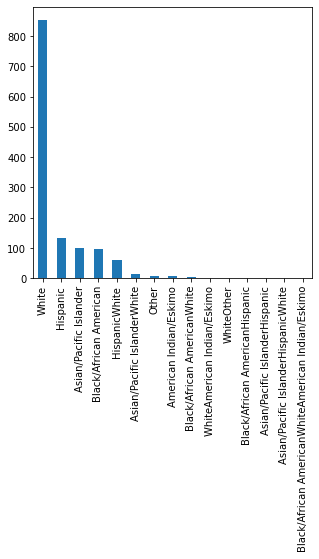

In [235]:
count = survey['Race'].value_counts() 

fig = plt.figure(figsize=(5,5)) # define plot area
ax = fig.gca() # define axis    

count.plot.bar()

<AxesSubplot:>

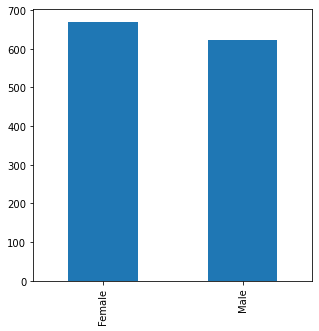

In [236]:
count = survey['Gender'].value_counts() 

fig = plt.figure(figsize=(5,5)) # define plot area
ax = fig.gca() # define axis    

count.plot.bar()

In [237]:
survey = survey[survey['Race'] != "Black/African AmericanHispanic"]
survey = survey[survey['Race'] != "Asian/Pacific IslanderWhite"]
survey = survey[survey['Race'] != "Black/African AmericanWhite"]
survey = survey[survey['Race'] != "Other"]
survey = survey[survey['Race'] != "WhiteAmerican Indian/Eskimo"]
survey = survey[survey['Race'] != "Asian/Pacific IslanderHispanicWhite"]
survey = survey[survey['Race'] != "Black/African AmericanWhiteAmerican Indian/Eskimo"]
survey = survey[survey['Race'] != "Asian/Pacific IslanderHispanic"]
survey = survey[survey['Race'] != "HispanicWhite"]



In [238]:
survey = survey[survey['Police Service Satisfaction'] != "Don't Know"]
survey = survey[survey['Police Service Satisfaction'] != "Neutral"]

<AxesSubplot:>

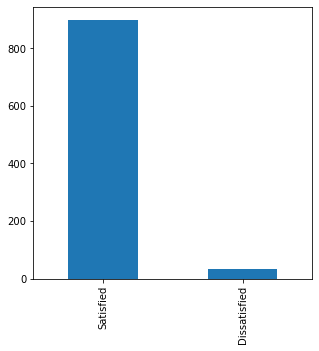

In [239]:
count = survey['Police Service Satisfaction'].value_counts() 

fig = plt.figure(figsize=(5,5)) # define plot area
ax = fig.gca() # define axis    

count.plot.bar()

In [240]:
survey['Gender'] = survey['Gender'].replace(['Male'],1)
survey['Gender'] = survey['Gender'].replace(['Female'],0)
survey['Police Service Satisfaction'] = survey['Police Service Satisfaction'].replace(["Satisfied"],0)
survey['Police Service Satisfaction'] = survey['Police Service Satisfaction'].replace(["Dissatisfied"],1)


In [241]:
survey['Police Service Satisfaction'].value_counts() 

0    899
1     33
Name: Police Service Satisfaction, dtype: int64

In [242]:
survey['Race'] = survey['Race'].replace(["White"],0)
survey['Race'] = survey['Race'].replace(["Hispanic"],1)
survey['Race'] = survey['Race'].replace(["Asian/Pacific Islander"],2)
survey['Race'] = survey['Race'].replace(["Black/African American"],3)
survey['Race'] = survey['Race'].replace(["American Indian/Eskimo"],4)
survey = survey.drop(['Paricipant ID'], axis = 1)


In [243]:
X=survey[['Gender','Race']]
y = survey.get('Police Service Satisfaction')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [244]:
survey_new_majority = survey[survey['Police Service Satisfaction'] == 0]
survey_new_minority = survey[survey['Police Service Satisfaction'] == 1]
survey_new_minority_upsampled = resample(survey_new_minority, 
                                 replace=True,    
                                 n_samples=survey['Police Service Satisfaction'].value_counts()[0],     
                                 random_state=123) # reproducible results
 

survey_new_upsampled = pd.concat([survey_new_minority_upsampled, survey_new_majority])
survey_new_upsample=shuffle(survey_new_upsampled)
survey_new_upsampled['Police Service Satisfaction'].value_counts()

0    899
1    899
Name: Police Service Satisfaction, dtype: int64

In [245]:
survey_new_upsampled

,Police Service Satisfaction,Gender,Race
154,1,0,4
1208,1,1,0
791,1,0,0
895,1,1,2
1000,1,1,0
...,...,...,...
1298,0,1,1
1300,0,1,0
1301,0,0,0
1302,0,0,0


In [246]:
X_train=survey_new_upsampled.drop(['Police Service Satisfaction'],axis=1)
y_train=survey_new_upsampled.get('Police Service Satisfaction')

In [247]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(y_train)
print(y_pred)

154     1
1208    1
791     1
895     1
1000    1
       ..
1298    0
1300    0
1301    0
1302    0
1303    0
Name: Police Service Satisfaction, Length: 1798, dtype: int64
[0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1
 1 1]


In [248]:
from sklearn import metrics
cmf_matrix = metrics.confusion_matrix(y_test, y_pred)
cmf_matrix

array([[99, 82],
       [ 2,  4]], dtype=int64)

In [249]:
X_train

,Gender,Race
154,0,4
1208,1,0
791,0,0
895,1,2
1000,1,0
...,...,...
1298,1,1
1300,1,0
1301,0,0
1302,0,0


In [250]:
y_train

154     1
1208    1
791     1
895     1
1000    1
       ..
1298    0
1300    0
1301    0
1302    0
1303    0
Name: Police Service Satisfaction, Length: 1798, dtype: int64

In [251]:
lr_scores_test=[]
lr_scores_train=[]
for this_C in (.1,1):
    logisticRegr= LogisticRegression(C=this_C).fit(X_train, y_train)
    lr_scores_test.append(logisticRegr.score(X_test, y_test))
    lr_scores_train.append(logisticRegr.score(X_train, y_train))
    pred = logisticRegr.predict(X_test)
    predProbs = logisticRegr.predict_proba(X_test)
    probs = predProbs[:, 1]
    cm1 = confusion_matrix(y_test, pred)
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)
print(logisticRegr.coef_,predProbs)

AUC: 0.585
AUC: 0.585
[[0.89665485 0.18365546]] [[0.56986644 0.43013356]
 [0.65669878 0.34330122]
 [0.65669878 0.34330122]
 [0.65669878 0.34330122]
 [0.65669878 0.34330122]
 [0.56986644 0.43013356]
 [0.65669878 0.34330122]
 [0.43830655 0.56169345]
 [0.43830655 0.56169345]
 [0.65669878 0.34330122]
 [0.47851208 0.52148792]
 [0.43830655 0.56169345]
 [0.56986644 0.43013356]
 [0.61419057 0.38580943]
 [0.65669878 0.34330122]
 [0.52439332 0.47560668]
 [0.43830655 0.56169345]
 [0.65669878 0.34330122]
 [0.61419057 0.38580943]
 [0.65669878 0.34330122]
 [0.65669878 0.34330122]
 [0.35084008 0.64915992]
 [0.61419057 0.38580943]
 [0.65669878 0.34330122]
 [0.61419057 0.38580943]
 [0.43830655 0.56169345]
 [0.43830655 0.56169345]
 [0.65669878 0.34330122]
 [0.3102386  0.6897614 ]
 [0.65669878 0.34330122]
 [0.65669878 0.34330122]
 [0.43830655 0.56169345]
 [0.65669878 0.34330122]
 [0.65669878 0.34330122]
 [0.65669878 0.34330122]
 [0.43830655 0.56169345]
 [0.65669878 0.34330122]
 [0.43830655 0.56169345]
 [

In [252]:
 lr_scores_train

[0.6245828698553949, 0.6245828698553949]

In [253]:
y_train

154     1
1208    1
791     1
895     1
1000    1
       ..
1298    0
1300    0
1301    0
1302    0
1303    0
Name: Police Service Satisfaction, Length: 1798, dtype: int64

In [254]:
 lr_scores_test

[0.5508021390374331, 0.5508021390374331]

In [255]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logisticRegr, X,y,cv=20)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.02)


In [256]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(logisticRegr, X, y, cv=5)
sorted(cv_results.keys())
['fit_time', 'score_time', 'test_score']
cv_results['test_score']
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.02)


In [257]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,  pred )))
print('Precision: {:.2f}'.format(precision_score(y_test,  y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test,  y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))
score = logisticRegr.score(X_test, y_test)
print(score)

Accuracy: 0.55
Precision: 0.05
Recall: 0.67
F1: 0.09
0.5508021390374331


<AxesSubplot:>

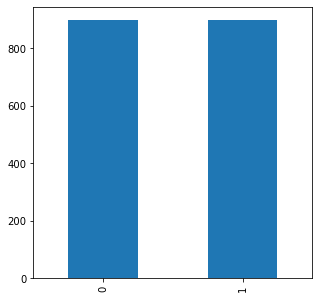

In [258]:
count = survey_new_upsampled['Police Service Satisfaction'].value_counts() 

fig = plt.figure(figsize=(5,5)) # define plot area
ax = fig.gca() # define axis    

count.plot.bar()

In [259]:
survey_new_upsampled.corr()

,Police Service Satisfaction,Gender,Race
Police Service Satisfaction,1.000000,0.216176,0.091646
Gender,0.216176,1.000000,-0.003170
Race,0.091646,-0.003170,1.000000


<AxesSubplot:>

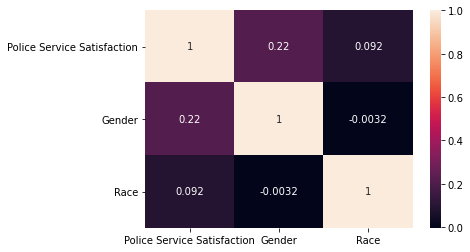

In [260]:
sns.heatmap(survey_new_upsampled.corr(), annot = True)

In [261]:
from sklearn.metrics import confusion_matrix
lr_scores_test = []
lr_scores_train = []
for this_C in (.1,2):
    logisticRegr = LogisticRegression(C = this_C).fit(X_train, y_train)
    lr_scores_test.append(logisticRegr.score(X_test, y_test))
    lr_scores_test.append(logisticRegr.score(X_train, y_train))
    pred = logisticRegr.predict(X_test)
    predProbs - logisticRegr.predict_proba(X_test)
    probs = predProbs[:,1]
    cm1 = confusion_matrix(y_test, pred)
    cm1

In [262]:
cm1


array([[99, 82],
       [ 2,  4]], dtype=int64)